# Who are the open source contributors?

## Introduction

Open source is everywhere. We developers use a very large number of open source packages and tools every single day. It is impossible to imagine a world without open source today, without all the amazing software that we use in our projects.

Is there a way to find out who these open source contributors are, and what kind of profile they have?

Stackoverflow has been collecting data from thousands of developers and publish survey results that give interesting insights into the overall trends like tools and technologies, salaries of developers, etc. They also collected information on whether a survey respondent contributes to open source software. This data on open source contributions is available for years 2019, 2018 and 2017.

While Stack Overflow's [survey insights (2019)](https://insights.stackoverflow.com/survey/2019) does not provide any observed pattern on those developers who contribute to open source, we can do it ourselves using the raw data. Let's look at open source contributors by:

1. Operating System that they use
2. Salary
3. Career satisfaction

## Methodology

Our primary objective is to get insights into the typical profile of an open source developer. We have the Stack Overflow survey data for year 2019, which gives "Open Source" data in a categorical variable (radio button selection), with the following options:

* Once a month or more often
* Less than once a month but more than once per year
* Less than once per year
* Never

We would like to see how it correlates with other categorical data like Operating System that they use (do Linux users contribute more than Windows users?), Salary (in categorical bins), Career satisfaction, etc.

The best way to extract any correlations between two categorical variables is by forming a contingency table between the two variables (cross tabulation, or crosstab). Pandas provides a convenient function for this: `pd.crosstab` which is used for all the analysis in this article. 

## Step 1 - Load data for analysis

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the survey data and sample the first few rows

In [2]:
# Load the 2019 developer survey data
survey_2019 = pd.read_csv('data/2019.csv')
survey_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
# Find the number of data points
survey_2019.shape

(88883, 85)

Conveniently for us, the `OpenSourcer` column is available. The survey dataset also has responses from over 88,000 developers from all over the world, giving us enough data to identify trends, if any.

Let's start by analyzing the options for open source contributions in the survey questionnaire.

In [4]:
# Let's look at high level numbers for users contributing to Open Source
survey_2019["OpenSourcer"].value_counts()

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

This looks interesting - nearly two-thirds of users have contributed to open source at least once.

## Step 2 - Analyze data

As mentioned in the methodology above, we will now use `pd.crosstab` function after required pre-processing of categorical variables to find the correlations between them.

### Open Sourcers by Operating System

Let's start our analysis at the very basic level: Do open source contributors use Linux more than Windows? Where does MacOS stand, given the fact that we see so many Macbook users in all the tech conferences and youtube videos.

Let's look at the total number of users using these operating systems:

In [5]:
pd.DataFrame(survey_2019["OpSys"].value_counts())

,OpSys
Windows,41714
MacOS,23541
Linux-based,22472
BSD,124


As expected, we see a lot of developers who use Windows for their work. While this seems large, we can already identify a pattern here: More developers actually prefer MacOS or Linux compared to the overall market share of these operating systems.

Source: https://gs.statcounter.com/os-market-share/desktop/worldwide

From publicly available statistics, we see that over 80% of computer users tend to get a Windows computer. This is also reflected in the sales statistics - most companies selling computer hardware bundle Windows along with the laptop or desktop. As MacOS comes bundled with Apple computers, the only way to be on MacOS platform is by getting an Apple computer, which has a 16% market share as per the webpage linked above.

Linux users mostly get a Windows laptop and dual boot into Linux. The other option for a Linux user is to build a desktop on their own. These are also the power users who understand technology much better than the average user and therefore they can get things done that a regular computer user cannot do.

Given these facts, especially the fact that Windows has a market share of over 75%, it is interesting to see that we have an equal number of Linux and MacOS users and taken together, they outnumber the Windows users in this developer survey.

To get the number of users within a given group who also contribute to OpenSource, we can use `value_counts()` function as follows:

In [6]:
# Let's take a subset of data frame - only those rows corresponding to Linux users, and then look at summary of Open source contributors
survey_2019[survey_2019["OpSys"] == "Linux-based"]["OpenSourcer"].value_counts()

Less than once per year                               6283
Less than once a month but more than once per year    6159
Never                                                 6045
Once a month or more often                            3985
Name: OpenSourcer, dtype: int64

We have the numbers for Linux users now, but it will lead to a tedious amount of work to get these numbers for all 3 operating systems - Linux, MacOS and Windows, and get these numbers into a dataframe for further analysis. Luckily for us, Pandas provides a convenient method to extract the relationship between two categorical values - `pd.crosstab`.

There is still one problem we need to solve: The data for `OpenSourcer` column has row labels that does not make sense when sorted alphabetically. For these values, "Never" is in one extreme, while "Once a month or more often" is on the other extreme. We will also prefer to sort these values (rows) in the correct logical order (and not alphabetically).

In [7]:
# We do not want the rows to be arranged in alphabetical order.
# This is the order in which we want the rows to appear
open_sourcer_row_order = ["Once a month or more often",
                          "Less than once a month but more than once per year",
                          "Less than once per year",
                          "Never"]

Having defined the order in which we want these values to appear, let's proceed with the crosstab analysis and see how the data looks like.

In [8]:
opsys_opensourcer = pd.crosstab(survey_2019["OpenSourcer"], survey_2019["OpSys"]).reindex(open_sourcer_row_order)

# One of the row indexes is very long and therefore not showing up well in graphs.
# Let's rename it to keep it simple
opsys_opensourcer = opsys_opensourcer.rename(
    index={"Less than once a month but more than once per year": "Less than once per month"})


opsys_opensourcer

OpSys,BSD,Linux-based,MacOS,Windows
OpenSourcer,,,,
Once a month or more often,31,3985,3058,3813
Less than once per month,32,6159,6443,7756
Less than once per year,36,6283,7062,11352
Never,25,6045,6978,18793


We can't see much yet at the moment other than the fact that there are more open source contributors using Linux in absolute numbers than Windows users, even though there are twice as many developers using Windows.

It will be great if we can have a percentage of Windows or Linux or MacOS users in each of these rows.

In [9]:
# Find the total number of users in each row and use it to find percentage for each operating system
opsys_opensourcer_percent = opsys_opensourcer.div(opsys_opensourcer.sum(axis=1), axis=0).mul(100).round(2)
opsys_opensourcer_percent

OpSys,BSD,Linux-based,MacOS,Windows
OpenSourcer,,,,
Once a month or more often,0.28,36.60,28.09,35.02
Less than once per month,0.16,30.21,31.60,38.04
Less than once per year,0.15,25.40,28.55,45.90
Never,0.08,18.98,21.92,59.02


In the table above, each of the rows sum up to 100%.

We can see a clear pattern here: more frequent open source contributors are more likely to use Linux-based (36%) or MacOS (28%) than Windows. This is significant in the light of market share enjoyed by Windows computers (75%) based on sales figures and general usage statistics.

Considering that open source contributors also are considered to be the ones with advanced knowledge of software and tools, it can be inferred based on these numbers that Linux or MacOS is the preferred choice of good developers.

Another way to look at this data is by plotting a pie-chart for the two extreme categories - Linux and Windows. Let's try it now.

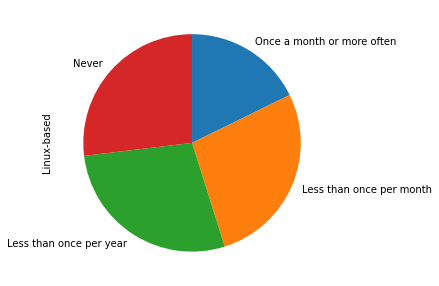

In [10]:
opsys_opensourcer["Linux-based"].plot.pie(figsize=(5, 5),
                                          startangle=90,
                                          legend=False,
                                          counterclock=False);

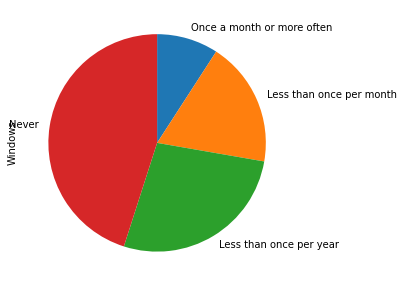

In [11]:
opsys_opensourcer["Windows"].plot.pie(figsize=(5, 5),
                                      startangle=90,
                                      legend=False,
                                      counterclock=False);

### Open Sourcers by salary

A good number of articles do mention that developers who contribute to open source get the rewards indirectly via much faster career progression. There may be a lot of truth in this, but we now have an opportunity to test this with data.

One proxy for career progression is salary. If open source contributers do see more opportunities, then they should also be getting higher salaries than average.

Let's look at the salary ranges of open sourcers.

Salary numbers are represented in USD in the `ConvertedComp` column.

In [12]:
survey_2019["ConvertedComp"].describe()

count    5.582300e+04
mean     1.271107e+05
std      2.841523e+05
min      0.000000e+00
25%      2.577750e+04
50%      5.728700e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

We can see the quartile markers already in the above analysis - the top 25% users get over 200k USD per annum while the bottom 25% users get 25k USD per annum or lower.

Salary is reported as an absolute number, but it will be easier for us to convert it to a categorical variable for our analysis. We can do this easily by classifying users into 4 different buckets (quartiles).

Pandas gives us a convenient function `pd.qcut` that introduces a new column based on an existing int or float column and splits into the number of buckets that we specify (4 in this case).

In [13]:
# Split the salary data into 4 equal buckets
survey_2019["SalaryCategory"] = pd.qcut(survey_2019["ConvertedComp"], q=4)

# Analyse the data that we have for salary buckets
survey_2019["SalaryCategory"].value_counts()

(25777.5, 57287.0]       14265
(-0.001, 25777.5]        13956
(57287.0, 100000.0]      13825
(100000.0, 2000000.0]    13777
Name: SalaryCategory, dtype: int64

Now that we have salary category as a categorical variable, we can proceed to analyze using a cross tabulation or `crosstab` with the open sourcer category.

In [14]:
salary_opensourcer = pd.crosstab(survey_2019["OpenSourcer"], survey_2019["SalaryCategory"]).reindex(open_sourcer_row_order)

# One of the row indexes is very long and therefore not showing up well in graphs.
# Let's rename it to keep it simple
salary_opensourcer = salary_opensourcer.rename(
    index={"Less than once a month but more than once per year": "Less than once per month"})

# View this cross tabulation data
salary_opensourcer

SalaryCategory,"(-0.001, 25777.5]","(25777.5, 57287.0]","(57287.0, 100000.0]","(100000.0, 2000000.0]"
OpenSourcer,,,,
Once a month or more often,1626,1338,1573,1884
Less than once per month,3089,3401,3546,3637
Less than once per year,3915,4254,4201,4177
Never,5326,5272,4505,4079


Let's also look at percentages to see if there is any interesting pattern. 

In [15]:
# Sum up the total in all rows and report percentages for every group of open source contributors
salary_opensourcer.div(salary_opensourcer.sum(axis=1), axis=0).mul(100).round(2)

SalaryCategory,"(-0.001, 25777.5]","(25777.5, 57287.0]","(57287.0, 100000.0]","(100000.0, 2000000.0]"
OpenSourcer,,,,
Once a month or more often,25.32,20.84,24.50,29.34
Less than once per month,22.59,24.87,25.93,26.60
Less than once per year,23.66,25.71,25.39,25.24
Never,27.77,27.48,23.49,21.26


In the table above, each row sums up to 100%.

This data suggests that those contributing frequently to open source (once a month or more) have a 29% chance of being in the highest possible salary bucket, considerably higher compared to those who do not contribute to open source.

While there may not be any direct causation like contributing to open source leading to higher salary, we can say with confidence that open source contributors are more skilled based on this data.

There can be indirect causation - contributing to open source can increase the skill levels of a developer, thus pushing them to higher salary buckets.

### Open Sourcers by Job or Career Satisfaction

Are developers likely to contribute to open source software when they are satisfied with their jobs or careers?

Let's find out based on available data. We have both `CareerSat` and `JobSat` responses from the participants. Let's go with `CareerSat` as contributing to open source is a life long activity and it does not start or stop with one job.

To get started, let's look at how career satisfaction is recorded:

In [16]:
survey_2019["CareerSat"].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

It is already a categorical variable. So let's proceed to directly do the cross tabulation.

Here we need to rename a 

In [17]:
careersat_opensourcer = pd.crosstab(survey_2019["OpenSourcer"], survey_2019["CareerSat"]).reindex(open_sourcer_row_order)

column_order = ["Very dissatisfied",
                "Slightly dissatisfied",
                "Neither satisfied nor dissatisfied",
                "Slightly satisfied",
                "Very satisfied"]

careersat_opensourcer = careersat_opensourcer[column_order]

# One of the row indexes and one column header are very long and therefore not showing up well in tables.
# Let's rename them to keep it simple
careersat_opensourcer = careersat_opensourcer.rename(
    index={"Less than once a month but more than once per year": "Less than once per month"},
    columns={"Neither satisfied nor dissatisfied":"Neutral"}
)

careersat_opensourcer

CareerSat,Very dissatisfied,Slightly dissatisfied,Neutral,Slightly satisfied,Very satisfied
OpenSourcer,,,,,
Once a month or more often,447,712,799,2689,4119
Less than once per month,810,1630,1617,6049,7499
Less than once per year,1114,2304,2160,7439,8332
Never,1363,3024,2676,8841,9223


We cannot see much from this result as the number of people in each columns are very different. Let's get the percentage of people in each of these categories.

In [18]:
careersat_opensourcer.div(careersat_opensourcer.sum(axis=1), axis=0).mul(100).round(2)

CareerSat,Very dissatisfied,Slightly dissatisfied,Neutral,Slightly satisfied,Very satisfied
OpenSourcer,,,,,
Once a month or more often,5.10,8.12,9.11,30.68,46.99
Less than once per month,4.60,9.26,9.18,34.36,42.60
Less than once per year,5.22,10.79,10.12,34.84,39.03
Never,5.42,12.03,10.65,35.19,36.71


Like before, every row totals to 100% in the table above.

We see a pattern here - those who contribute more often to open source are likely to report a higher career satisfaction (47%). This again could be caused because of the indirect causation mentioned earlier: contributing to open source increase skill levels, thus allowing them to do their jobs better and therefore ending up with higher satisfaction levels.

The satisfaction numbers are lesser in the lower rows (people contributing lesser to open source), with the last category of user having only a 36.7% chance of reporting the highest career satisfaction.

## Conclusion

We started this exercise with some assumptions based on what we have seen till now, expected to find patterns and did find some of the patterns however insignificant it might be.

Here are some of the insights we got from the available data:
1. Developers contributing to open source do prefer Linux or MacOS compared to Windows for their work computer
2. Open source contributors are more likely to get higher salary
3. Open source contributors report a higher career satisfaction